# Import Packages

In [1]:
import xgi
import hypercontagion as hc
import matplotlib.pyplot as plt
import time
import numpy as np
import random

# Set Up the Hypergraph
* Specify the number of nodes
* Specify the hyperdegree distribution
* Generates a configuration model of the hypergraph

In [2]:
n = 1000
k1 = {i : random.randint(5, 10) for i in range(n)}
k2 = {i : sorted(k1.values())[i] for i in range(n)}
H = xgi.chung_lu_hypergraph(k1, k2)

# Epidemic Simulations

## Epidemic Parameters
* Initial size is the number of initial infected nodes
* $\gamma$ is the healing rate of a node
* $\mathbf{\beta}$ is the infection rate for each hyperedge size (keys are the hyperedge size and the value is the infection rate)

In [20]:
initial_size = 100
gamma = 0.05
tau = {i: 0.1 for i in xgi.unique_edge_sizes(H)}

## Run an SIR simulation on hypergraphs
* First simulation is is with discrete time steps (DTMC)
* Second simulation is the Gillespie algorithm (CTMC)

In [44]:
start = time.time()
t1, S1, I1, R1 = hc.discrete_SIR(H, tau, gamma, tmin=0, tmax=100, dt=1, rho=0.1)
print(time.time() - start)

start = time.time()
t2, S2, I2, R2 = hc.Gillespie_SIR(H, tau, gamma, tmin=0, tmax = 100, rho=0.1)
print(time.time() - start)

start = time.time()
t3, S3, I3, R3 = hc.event_driven_SIR(H, tau, gamma, tmin=0, tmax=100, dt=1, rho=0.1)
print(time.time() - start)

0.5611476898193359
0.1828601360321045
0.6752619743347168


### Plot the results

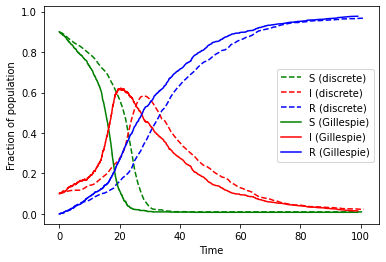

In [45]:
plt.figure()
plt.plot(t1, S1/n, 'g--', label="S (discrete)")
plt.plot(t1, I1/n, 'r--', label="I (discrete)")
plt.plot(t1, R1/n, 'b--', label="R (discrete)")
plt.plot(t2, S2/n, 'g-', label="S (Gillespie)")
plt.plot(t2, I2/n, 'r-', label="I (Gillespie)")
plt.plot(t2, R2/n, 'b-', label="R (Gillespie)")
# plt.plot(t3, S3/n, 'g-.', label="S (event-driven)")
# plt.plot(t3, I3/n, 'r-.', label="I (event-driven)")
# plt.plot(t3, R3/n, 'b-.', label="R (event-driven)")
plt.legend()
# plt.xlim([0, 50])
plt.xlabel('Time')
plt.ylabel('Fraction of population')
plt.savefig("../Figures/SIR_comparison.pdf", dpi=1000)
plt.savefig("../Figures/SIR_comparison.png", dpi=1000)
plt.show()

## Run an SIS simulation on hypergraphs
* First simulation is is with discrete time steps (DTMC)
* Second simulation is the Gillespie algorithm (CTMC)

In [46]:
tmax = 50
t1, S1, I1 = hc.discrete_SIS(H, tau, gamma, tmin=0, tmax=50, dt=1, rho=0.5)
t2, S2, I2 = hc.Gillespie_SIS(H, tau, gamma, tmin=0, tmax=50, rho=0.5)
t3, S3, I3 = hc.event_driven_SIS(H, tau, gamma, tmin=0, tmax=50, rho=0.5)

### Plot the results

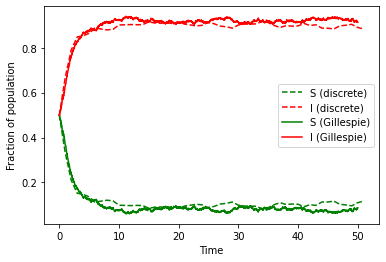

In [48]:
plt.figure()
plt.plot(t1, S1/n, 'g--', label="S (discrete)")
plt.plot(t1, I1/n, 'r--', label="I (discrete)")
plt.plot(t2, S2/n, 'g-', label="S (Gillespie)")
plt.plot(t2, I2/n, 'r-', label="I (Gillespie)")
# plt.plot(t3, S3/n, 'g.', label="S (event-driven)")
# plt.plot(t3, I3/n, 'r.', label="I (event-driven)")
plt.legend()
plt.xlabel('Time')
plt.ylabel('Fraction of population')
plt.savefig("../Figures/SIS_comparison.pdf", dpi=1000)
plt.savefig("../Figures/SIS_comparison.png", dpi=1000)
plt.show()


# Opinion Models
* Discrete state, random update (Voter model)
* Discrete state, deterministic update (Majority rule)
* Continuous state, random update (Deffuant-Weisbuch model)
* Continuous state, deterministic update (Hegelmann-Krause)

## Voter Model
* Binary opinion: For/Against or Yes/No
* Randomly choose a hyperedge and if a majority of neighbors believe the opposite, then you change your mind 

### Run simulation

In [74]:
yes_and_no = [random.choice(["Yes", "No"]) for i in range(n)]
yes_and_no = np.array(yes_and_no, dtype=object)
t, voter_model_states = hc.simulate_random_node_and_group_discrete_state(H, yes_and_no, tmin=0, tmax=10000)

### Plot Results

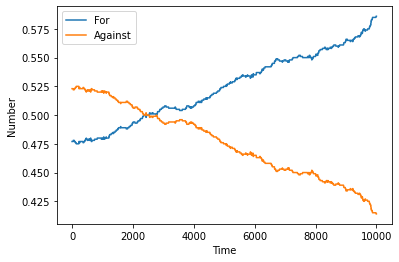

In [75]:
yes = np.count_nonzero(voter_model_states == "Yes", axis=0)
no = np.count_nonzero(voter_model_states == "No", axis=0)
plt.figure()
plt.plot(t, yes/n, label="For")
plt.plot(t, no/n, label="Against")
plt.xlabel("Time")
plt.ylabel("Number")
plt.legend()
plt.savefig("../Figures/voter_model.pdf", dpi=1000)
plt.savefig("../Figures/voter_model.png", dpi=1000)
plt.show()

## Deffuant-Weisbuch

$\epsilon$ is a "cautiousness" parameter

In [6]:
epsilon=0.3
initial_states = np.random.uniform(low=-1.0, high=1.0, size=n)
t, states_DW = hc.simulate_random_group_continuous_state_1D(H, initial_states, tmin = 0, tmax=2000, epsilon=epsilon)

### Plot Results

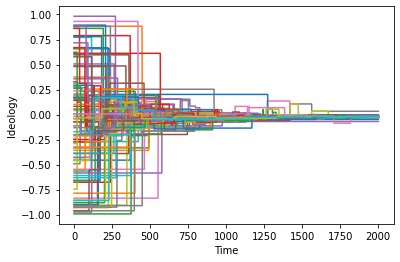

In [63]:
plt.figure()
plt.plot(t, states_DW[::10,:].T)
plt.xlabel("Time")
plt.ylabel("Ideology")
plt.savefig("../Figures/dw_model.pdf", dpi=1000)
plt.savefig("../Figures/dw_model.png", dpi=1000)
plt.show()

## Hegselmann-Krause

### Run Simulation

In [7]:
initial_states = np.random.uniform(low=-1.0, high=1.0, size=n)
t, states_HK = hc.synchronous_update_continuous_state_1D(H, initial_states, tmin=0, tmax=100)

### Plot Results

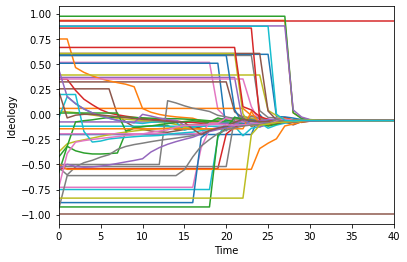

In [9]:
plt.figure()
plt.plot(t, states_HK[::20,:].T)
plt.xlabel("Time")
plt.ylabel("Ideology")
plt.xlim([0, 40])
plt.savefig("../Figures/hk_model.pdf", dpi=1000)
plt.savefig("../Figures/hk_model.png", dpi=1000)
plt.show()